# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [3]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [4]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [5]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [6]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

print(beta)

y_pred = np.matmul(X_test,beta[1:])

y_pred += beta[0]

MSE = np.mean(np.square(y_test-y_pred))

print('MSE =',MSE)
print('MAE =',np.sqrt(MSE))
print('standard deviation =',np.std(y_test))


[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]
MSE = 2794.569014500727
MAE = 52.86368332324874
standard deviation = 75.30463556298741


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [7]:
Features = breast_cancer.data
Classes = breast_cancer.target[:, np.newaxis]

X_train = Features[:400,:]
Y_train = Classes[:400,:]

X_test = Features[400:,:]
Y_test = Classes[400:,:]

print(X_train[:100])
print(X_test)

print('Feature space dimensions are:',X_train.shape,'for train and',X_test.shape,'for test')
print('Classes dimensions are:',Y_train.shape,'for train and',Y_test.shape,'for test')

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [9.787e+00 1.994e+01 6.211e+01 ... 2.381e-02 1.934e-01 8.988e-02]
 [1.160e+01 1.284e+01 7.434e+01 ... 8.449e-02 2.772e-01 8.756e-02]
 [1.442e+01 1.977e+01 9.448e+01 ... 1.565e-01 2.718e-01 9.353e-02]]
[[1.791e+01 2.102e+01 1.244e+02 ... 1.964e-01 3.245e-01 1.198e-01]
 [1.193e+01 1.091e+01 7.614e+01 ... 6.876e-02 2.460e-01 7.262e-02]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Feature space dimensions are: (400, 30) for train and (169, 30) for test
Classes dimensions are: (400, 1) for train and (169, 1) for test


In [32]:
import matplotlib.pyplot as plt


def knn_classifier(train_x,train_y,test_sample,k=1):
    
    test_sample_normalized = []
    
    #Normalizes all features to conform to a range of [0,1] by dividing by the maximum value for every feature.
    for col in range(len(test_sample)):
        max_val = np.max(train_x[:, col])
        test_sample_normalized.append(test_sample[col] / max_val)
    
    train_x_normalized = train_x.copy()
    
    for col in range(train_x.shape[1]):
        train_x_normalized[:,col] = train_x[:,col]/np.max(train_x[:,col])
       
    dist_to_class = {}
    distances = []
    
    #Determine distances, and set class to a bijbehorende distance value
    for row in range(train_x_normalized.shape[0]):
        distance = np.sqrt(np.sum(np.square(train_x_normalized[row,:] - test_sample_normalized)))
        dist_to_class[distance] = train_y[row]
        distances.append(distance)
    
    neighbours = []
    sorted_distances = np.sort(distances)
    
    #Take into account k amount of neighbours
    for neighbour in range(k):
        dist = sorted_distances[neighbour]
        print('Distance',dist,'with class',dist_to_class[dist])
        neighbours.append(dist_to_class[dist])
    
    Avg_class = np.mean(neighbours)
    print(Avg_class)
    
    
    #If average value of all classes is above 0.5, there are more 1's than 0's so the output should be 1
    if Avg_class <= 0.5:
        return 0
    else:
        return 1

In [38]:
#CALLING FUNCTION
accuracies = []
max_k_value = 10

for kvalue in range(1,max_k_value+1):
    acc = 0
    for i in range(X_test.shape[0]):
    
        Prediction = knn_classifier(train_x=X_train,train_y=Y_train,test_sample=X_test[i,:],k=kvalue)
        print('pred is:',Prediction)
        print('Actual value is:',Y_test[i])
        if Prediction == Y_test[i]:
            acc += 1
    accuracies.append((acc/X_test.shape[0])*100)

Distance 0.46516447781303216 with class [0]
0.0
pred is: 0
Actual value is: [0]
Distance 0.1509156290183621 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.24154653940615925 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.1657957076836293 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.2162050705376421 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.21464791143454753 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.1740215988049416 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.28158981503317787 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.23945510464081704 with class [0]
0.0
pred is: 0
Actual value is: [0]
Distance 0.22587266815237989 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.22211730444886907 with class [0]
0.0
pred is: 0
Actual value is: [1]
Distance 0.18943604247939239 with class [1]
1.0
pred is: 1
Actual value is: [1]
Distance 0.32130313777731184 with class [1]


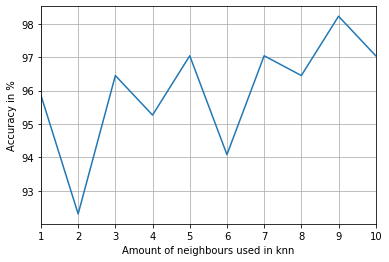

In [39]:
#PLOTTING RESULTS
plt.plot(range(1,max_k_value+1),accuracies)
plt.grid(True)
plt.xlabel('Amount of neighbours used in knn')
plt.ylabel('Accuracy in %')
plt.xlim(1,max_k_value)
plt.show()

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

In [40]:
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

In [45]:
def knn_regression(train_x,train_y,test_sample,k=1):
    
    test_sample_normalized = []
    
    #Normalizes all features to conform to a range of [0,1] by dividing by the maximum value for every feature.
    for col in range(len(test_sample)):
        max_val = np.max(train_x[:, col])
        test_sample_normalized.append(test_sample[col] / max_val)
    
    #Copying otherwise it will change the initial state of the variable (thanks jupyter :3)
    train_x_normalized = train_x.copy()
    
    for col in range(train_x.shape[1]):
        train_x_normalized[:,col] = train_x[:,col]/np.max(train_x[:,col])
    
    dist_to_value = {}
    distances = []
    
    #Determine distances and bijbehorende value
    for row in range(train_x_normalized.shape[0]):
        distance = np.sqrt(np.sum(np.square(train_x_normalized[row,:] - test_sample_normalized)))
        dist_to_value[distance] = train_y[row]
        distances.append(distance)
    
    neighbours = []
    sorted_distances = np.sort(distances)
    
    #Determine all values from neighbours taken into account
    for neighbour in range(k):
        dist = sorted_distances[neighbour]
        neighbours.append(dist_to_value[dist])
    
    #Compute the average values of these neighbours
    avg_value = np.mean(neighbours)
    
    return avg_value

In [46]:
error = []
max_k_value = 10
error_per_kvalue = []

for kvalue in range(1,max_k_value+1):
    acc = 0
    for i in range(X_test.shape[0]):
    
        Prediction = knn_regression(train_x=X_train,train_y=y_train,test_sample=X_test[i,:],k=kvalue)
        print('pred is:',Prediction)
        print('Actual value is:',y_test[i])
        error.append(np.sqrt(np.square(Prediction-y_test[i])))
    
    error_per_kvalue.append(np.mean(error))

pred is: 265.0
Actual value is: [275.]
pred is: 102.0
Actual value is: [65.]
pred is: 202.0
Actual value is: [198.]
pred is: 248.0
Actual value is: [236.]
pred is: 138.0
Actual value is: [253.]
pred is: 126.0
Actual value is: [124.]
pred is: 200.0
Actual value is: [44.]
pred is: 81.0
Actual value is: [172.]
pred is: 37.0
Actual value is: [114.]
pred is: 100.0
Actual value is: [142.]
pred is: 288.0
Actual value is: [109.]
pred is: 164.0
Actual value is: [180.]
pred is: 68.0
Actual value is: [144.]
pred is: 275.0
Actual value is: [163.]
pred is: 184.0
Actual value is: [147.]
pred is: 59.0
Actual value is: [97.]
pred is: 161.0
Actual value is: [220.]
pred is: 67.0
Actual value is: [190.]
pred is: 73.0
Actual value is: [109.]
pred is: 202.0
Actual value is: [191.]
pred is: 151.0
Actual value is: [122.]
pred is: 220.0
Actual value is: [230.]
pred is: 310.0
Actual value is: [242.]
pred is: 241.0
Actual value is: [248.]
pred is: 67.0
Actual value is: [249.]
pred is: 164.0
Actual value is: [19

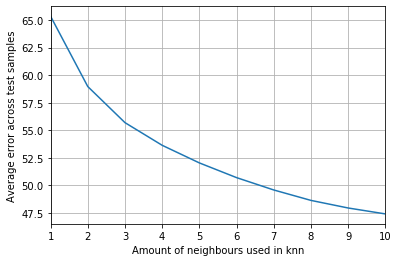

In [48]:
#PLOTTING RESULTS
plt.plot(range(1,max_k_value+1),error_per_kvalue)
plt.grid(True)
plt.xlabel('Amount of neighbours used in knn')
plt.ylabel('Average error across test samples')
plt.xlim(1,max_k_value)
plt.show()

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>

